In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!unzip -q "/content/gdrive/My Drive/hw4.zip"

Mounted at /content/gdrive
replace hw4.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


**Question 2**

In [ ]:
import numpy as np
#we set this to 4 so we can get the correct 4th decimal precision for all vals
np.set_printoptions(precision=4)
#we can use our next s formula, and directly input it as follows:
def nexts(x, w):
  return 1 / (1 + np.exp(-1 * x.dot(w)))
#we craeted our weight update formula in part 3, and we can use that to create 
# this function
def nextw(x, w, s, y):
  #create d(si(1-si))
  A = np.diag(np.multiply(s, 1-s))
  #our second derivative of J term is here
  deltwoj = x.T.dot(A).dot(x)
  #we have to take the inverse of this term plus the lambda factor
  deltwojinv = np.linalg.inv(deltwoj)
  #next we need the derivative of J term and the lambda term accounted for
  delj = -1 * x.T.dot(y - s)
  wprime = w - deltwojinv.dot(delj)
  return wprime
#now we define our x, y and initial weight arrays as defined in the problem
X = np.array([[0.2, 3.1, 1], [1.0, 3.0, 1], [-0.2, 1.2, 1], [1.0, 1.1, 1]])
Y = np.array([1, 1, 0, 0])
w0 = np.array([-1, 1, 0])
#here we calculate all the values and print them out
s0 = nexts(X, w0)
print("a :", s0)
w1 = nextw(X, w0, s0, Y)
print("b :", w1)
s1 = nexts(X, w1)
print("c :", s1)
w2 = nextw(X, w1, s1, Y)
print("d :", w2)


a : [0.9478 0.8808 0.8022 0.525 ]
b : [ 1.3247  3.0499 -6.8291]
c : [0.9474 0.9746 0.0312 0.1044]
d : [ 1.366   4.1575 -9.1996]


**Question 3**

<ipython-input-34-51940fc2fb2b>:61: RuntimeWarning: divide by zero encountered in log
  allcosts[i + 1] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot], np.log(svec))


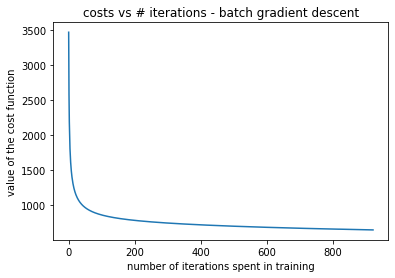

In [34]:
import numpy as np
import matplotlib.pyplot as plot
import scipy
from scipy import io
#we can first start by creating our function for the stochastic gradient descent
#this function will use the weight and our data in order to create a new s
#vector value and we do this according to the exponetial formulation as follows:
def update_s(w, x):
  #get the size and use that to set up our s vector then we use the formula
  #and get each value of the s vector
  datanum = x.shape[0]
  svec = np.zeros((datanum,))
  for i in np.arange(datanum):
    svec[i] = np.true_divide(1, 1 + np.exp(-np.dot(x[i], w)))
  return svec
#we first want to load all the data, adn we want to get the number of features
# and the total number of training events we have, and we want to use this to 
#randomize our data, and after randomizing our data we will use np to shuffle
#And we will split the data so it is 1000 6000 for thr 7000 entries we have
np.random.seed(0)
data = scipy.io.loadmat("data.mat")
tfeats = data['X']
tlabels = data['y']
ftot = len(tfeats[0])
ttot = len(tfeats)
alltraindat = np.append(tfeats, tlabels, axis=1)
np.random.shuffle(alltraindat)
valdata = alltraindat[:1000]
traindata = alltraindat[1000:ttot]
#now that we have all of our data randomized and set up for validating
#and for training we need to use the means and the standard deviations to 
#properly normalize the data, as this also helps to improve accuracy in general
meanvals = [np.mean(traindata[:,i]) for i in np.arange(ftot)]
stdvals = [np.std(traindata[:,i]) for i in np.arange(ftot)]
for i in np.arange(ftot):
  valdata[:,i] = valdata[:,i] - meanvals[i]
  valdata[:,i] = valdata[:,i] / stdvals[i]
  traindata[:,i] = traindata[:,i] - meanvals[i]
  traindata[:,i] = traindata[:,i] / stdvals[i]
#now we have properly set up all our data for the analysis, by creating our
#weight vector, our gradient of J vector, our learning rates and our constants
weight_v = np.zeros((ftot,))
delJ_v = np.zeros((ftot,))
allcosts = np.zeros((7001,))
svec = update_s(weight_v, traindata[:,:ftot])
#upon varying these values many times I have found that these are some of the best values
#to use to create our plots
l = 0.0001
c = 0.1
#after this we want to get the 0th value for the costs separately because our
#for loop won't go through that then we can move onto the costs
allcosts[0] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot], np.log(svec))
for i in np.arange(7000):
  #we build up to the value by first taking the difference
  dval = traindata[:,ftot] - svec
  #then we take the gradient using this
  delJ_v = c * weight_v - np.dot(np.transpose(traindata[:,:ftot]), dval)
  #after this we get the new weight vector after the gradient update
  weight_v = weight_v - l * delJ_v
  #finally we get the new s value by calling our s function on this weight
  svec = update_s(weight_v, traindata[:,:ftot])
  #getting our cost function value we use the same formula:
  allcosts[i + 1] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot], np.log(svec))
#finally after getting all the costs we will plot this data as follows:
plot.plot(np.arange(7001), allcosts)
plot.xlabel("number of iterations spent in training")
plot.ylabel("value of the cost function")
plot.title( "costs vs # iterations - batch gradient descent")
plot.show()

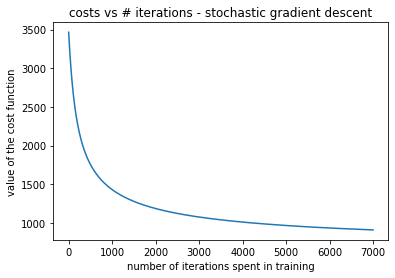

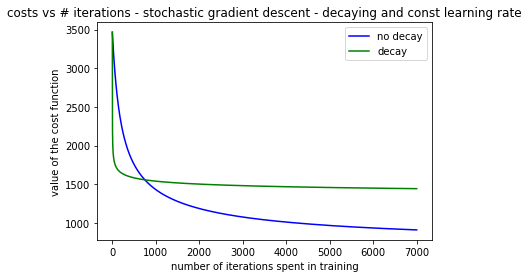

In [32]:
import numpy as np
import matplotlib.pyplot as plot
import scipy
from scipy import io
#This is identical to everything from before but we add the decaying one is all
#we can first start by creating our function for the stochastic gradient descent
#this function will use the weight and our data in order to create a new s
#vector value and we do this according to the exponetial formulation as follows:
def update_s(w, x):
  #get the size and use that to set up our s vector then we use the formula
  #and get each value of the s vector
  datanum = x.shape[0]
  svec = np.zeros((datanum,))
  for i in np.arange(datanum):
    svec[i] = np.true_divide(1, 1 + np.exp(-np.dot(x[i], w)))
  return svec
#we first want to load all the data, adn we want to get the number of features
# and the total number of training events we have, and we want to use this to 
#randomize our data, and after randomizing our data we will use np to shuffle
#And we will split the data so it is 1000 6000 for thr 7000 entries we have
np.random.seed(0)
data = scipy.io.loadmat("data.mat")
tfeats = data['X']
tlabels = data['y']
ftot = len(tfeats[0])
ttot = len(tfeats)
alltraindat = np.append(tfeats, tlabels, axis=1)
np.random.shuffle(alltraindat)
valdata = alltraindat[:1000]
traindata = alltraindat[1000:ttot]
#now that we have all of our data randomized and set up for validating
#and for training we need to use the means and the standard deviations to 
#properly normalize the data, as this also helps to improve accuracy in general
meanvals = [np.mean(traindata[:,i]) for i in np.arange(ftot)]
stdvals = [np.std(traindata[:,i]) for i in np.arange(ftot)]
for i in np.arange(ftot):
  valdata[:,i] = valdata[:,i] - meanvals[i]
  valdata[:,i] = valdata[:,i] / stdvals[i]
  traindata[:,i] = traindata[:,i] - meanvals[i]
  traindata[:,i] = traindata[:,i] / stdvals[i]
#now we have properly set up all our data for the analysis, by creating our
#weight vector, our gradient of J vector, our learning rates and our constants
weight_v = np.zeros((ftot,))
delJ_v = np.zeros((ftot,))
weigth_v_d = np.zeros((ftot,))
delJ_v_d = np.zeros((ftot,))
#upon varying these values many times I have found that these are some of the best values
#to use to create our plots
l = .000001
l_i = .0001
c = 0.1
allcosts = np.zeros((7001,))
allcosts_d = np.zeros((7001,))
svec = update_s(weight_v, traindata[:,:ftot])
svec_d = update_s(weigth_v_d, traindata[:,:ftot])
#after this we want to get the 0th value for the costs separately because our
#for loop won't go through that then we can move onto the costs
allcosts[0] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot],np.log(svec))
allcosts_d[0] = (c / 2) * np.sum(np.square(weigth_v_d)) - np.dot((1-traindata[:,ftot]), np.log(1-svec_d)) - np.dot(traindata[:,ftot],np.log(svec_d))
#now we need to make a tracker, so that we can reshuffle the data fot he decay rate properly
t = -1
for i in np.arange(7000):
  #here we define a decaying learning rate based off the number of iterations
  l_d = np.true_divide(l_i, i + 1)
  t += 1
  #here we shuffle the data at the value point for which the trianing data
  #is validation much away
  if t == 5000:
    np.random.shuffle(traindata)
    t = 0
  #we build up to the value by first taking the difference
  diff = traindata[:,ftot] - svec
  diff_s = traindata[:,ftot] - svec_d
  #then we take the gradient using this
  delJ_v = c * weight_v - np.dot(np.transpose(traindata[:,:ftot]), diff)
  delJ_v_d = c * weigth_v_d - np.dot(np.transpose(traindata[:,:ftot]), diff_s)
  #after this we get the new weight vector after the gradient update
  weight_v = weight_v - l * delJ_v
  weigth_v_d = weigth_v_d - l_d * delJ_v_d
  #finally we get the new s value by calling our s function on this weight
  svec = update_s(weight_v, traindata[:,:ftot])
  svec_d = update_s(weigth_v_d, traindata[:,:ftot])
  #getting our cost function value we use the same formula:
  allcosts[i + 1] = -np.dot(traindata[:,ftot], np.log(svec)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) + (c / 2) * np.sum(np.square(weight_v))
  allcosts_d[i + 1] = -np.dot(traindata[:,ftot], np.log(svec_d)) - np.dot((1-traindata[:,ftot]), np.log(1-svec_d)) + (c / 2) * np.sum(np.square(weigth_v_d))
#after getting all the data we plot it for the stochastic and the comparing for the decay
plot.plot(np.arange(7001), allcosts)
plot.xlabel("number of iterations spent in training")
plot.ylabel("value of the cost function")
plot.title( "costs vs # iterations - stochastic gradient descent")
plot.show()
plot.plot(np.arange(7001), allcosts, "-b", label = "no decay")
plot.plot(np.arange(7001), allcosts_d, "-g", label = "decay")
plot.xlabel("number of iterations spent in training")
plot.ylabel("value of the cost function")
plot.legend(loc="upper right")
plot.title( "costs vs # iterations - stochastic gradient descent - decaying and const learning rate")
plot.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plot
import scipy
from scipy import io
#we can first start by creating our function for the stochastic gradient descent
#this function will use the weight and our data in order to create a new s
#vector value and we do this according to the exponetial formulation as follows:
def update_s(w, x):
  #get the size and use that to set up our s vector then we use the formula
  #and get each value of the s vector
  datanum = x.shape[0]
  svec = np.zeros((datanum,))
  for i in np.arange(datanum):
    svec[i] = np.true_divide(1, 1 + np.exp(-np.dot(x[i], w)))
  return svec
#we first want to load all the data, adn we want to get the number of features
# and the total number of training events we have, and we want to use this to 
#randomize our data, and after randomizing our data we will use np to shuffle
#And we will split the data so it is 1000 6000 for thr 7000 entries we have
np.random.seed(0)
data = scipy.io.loadmat("data.mat")
tfeats = data['X']
tlabels = data['y']
testvals = data['X_test']
ftot = len(tfeats[0])
ttot = len(tfeats)
alltraindat = np.append(tfeats, tlabels, axis=1)
np.random.shuffle(alltraindat)
valdata = alltraindat[:1000]
traindata = alltraindat[1000:ttot]
#now that we have all of our data randomized and set up for validating
#and for training we need to use the means and the standard deviations to 
#properly normalize the data, as this also helps to improve accuracy in general
meanvals = [np.mean(traindata[:,i]) for i in np.arange(ftot)]
stdvals = [np.std(traindata[:,i]) for i in np.arange(ftot)]
meanvalstest = [np.mean(testvals[:,i]) for i in np.arange(ftot)]
stdvalstest = [np.std(testvals[:,i]) for i in np.arange(ftot)]
for i in np.arange(ftot):
  valdata[:,i] = valdata[:,i] - meanvals[i]
  valdata[:,i] = valdata[:,i] / stdvals[i]
  traindata[:,i] = traindata[:,i] - meanvals[i]
  traindata[:,i] = traindata[:,i] / stdvals[i]
  testvals[:,i] = testvals[:,i] - meanvalstest[i]
  testvals[:,i] = testvals[:,i] / stdvalstest[i]
#now we have properly set up all our data for the analysis, by creating our
#weight vector, our gradient of J vector, our learning rates and our constants
weight_v = np.zeros((ftot,))
delJ_v = np.zeros((ftot,))
allcosts = np.zeros((7001,))
svec = update_s(weight_v, traindata[:,:ftot])
#upon varying these values many times I have found that these are some of the best values
#to use to create our plots
l = 0.0001
c = 0.1
#after this we want to get the 0th value for the costs separately because our
#for loop won't go through that then we can move onto the costs
allcosts[0] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot], np.log(svec))
for i in np.arange(7000):
  #we build up to the value by first taking the difference
  dval = traindata[:,ftot] - svec
  #then we take the gradient using this
  delJ_v = c * weight_v - np.dot(np.transpose(traindata[:,:ftot]), dval)
  #after this we get the new weight vector after the gradient update
  weight_v = weight_v - l * delJ_v
  #finally we get the new s value by calling our s function on this weight
  svec = update_s(weight_v, traindata[:,:ftot])
  #getting our cost function value we use the same formula:
  allcosts[i + 1] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot], np.log(svec))

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submissionwine.csv', index_label='Id')


s_test = update_s(weight_v, testvals[:,:ftot])
pred = np.rint(s_test)
print(pred)
results_to_csv(pred)

<ipython-input-29-003ebd372e0f>:66: RuntimeWarning: divide by zero encountered in log
  allcosts[i + 1] = (c / 2) * np.sum(np.square(weight_v)) - np.dot((1-traindata[:,ftot]), np.log(1-svec)) - np.dot(traindata[:,ftot], np.log(svec))


[0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.

**Question 5**

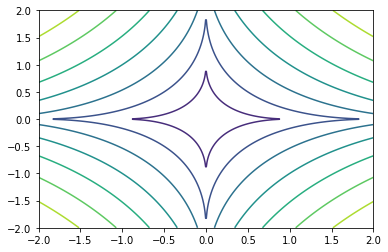

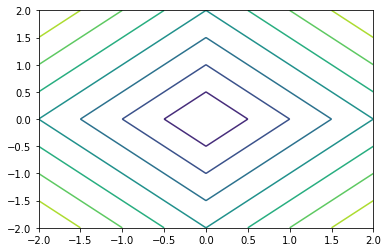

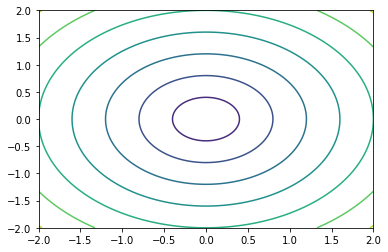

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
#here we want to define our lp function based off the functional definition, 
#and in doing so we have:
def lpcalc(p, x, y):
  return (np.abs(x)**p + np.abs(y)**p)**(1/p)
#here we define our linespaces and then we make a meshgrid for us to display 
#our curves
hor = np.linspace(-2, 2, 500)
vert = np.linspace(-2, 2, 500)
xc, yc = np.meshgrid(hor, vert)
#now all we need to do is plot our differen lp norms on different plots and 
#dispaly them:
f1 = lpcalc(0.5, xc, yc)
plot.contour(xc, yc, f1)
plot.show()
f2 = lpcalc(1, xc, yc)
plot.contour(xc, yc, f2)
plot.show()
f3 = lpcalc(2, xc, yc)
plot.contour(xc, yc, f3)
plot.show()